Columns หลังแปลงชื่อ:
['ship_mode', 'segment', 'country', 'city', 'state', 'postal_code', 'region', 'category', 'sub_category', 'sales', 'quantity', 'discount', 'profit']

Shape ของ DataFrame: (9994, 13)


,ship_mode,segment,country,city,state,postal_code,region,category,sub_category,sales,quantity,discount,profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ship_mode     9994 non-null   object 
 1   segment       9994 non-null   object 
 2   country       9994 non-null   object 
 3   city          9994 non-null   object 
 4   state         9994 non-null   object 
 5   postal_code   9994 non-null   int64  
 6   region        9994 non-null   object 
 7   category      9994 non-null   object 
 8   sub_category  9994 non-null   object 
 9   sales         9994 non-null   float64
 10  quantity      9994 non-null   int64  
 11  discount      9994 non-null   float64
 12  profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


,postal_code,sales,quantity,discount,profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000



ยอดขายรวมแต่ละหมวดหมู่ (Category):


,sales,profit
category,,
Technology,836154.0330,145454.9481
Furniture,741999.7953,18451.2728
Office Supplies,719047.0320,122490.8008



5 Sub-Category ที่มีกำไรสูงสุด:


sub_category
Copiers        55617.8249
Phones         44515.7306
Accessories    41936.6357
Paper          34053.5693
Binders        30221.7633
Name: profit, dtype: float64


ยอดขายรวมแต่ละภูมิภาค (Region):


,sales,profit
region,,
West,725457.8245,108418.4489
East,678781.2400,91522.7800
Central,501239.8908,39706.3625
South,391721.9050,46749.4303



จำนวน Order / ยอดขาย / กำไรแต่ละ Segment:


,sales,profit,quantity
segment,,,
Consumer,1.161401e+06,134119.2092,5191
Corporate,7.061464e+05,91979.1340,3020
Home Office,4.296531e+05,60298.6785,1783


C:\Users\ASUS\AppData\Local\Temp\ipykernel_20700\3754975790.py:87: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_sales.index, y=category_sales["sales"], palette="Blues_d")


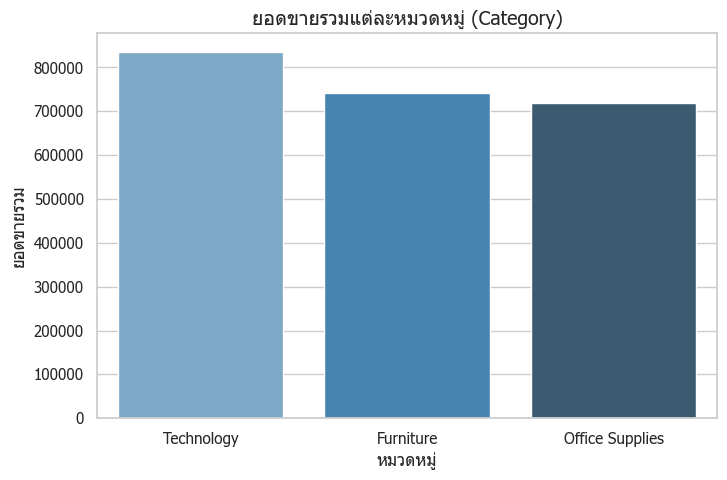

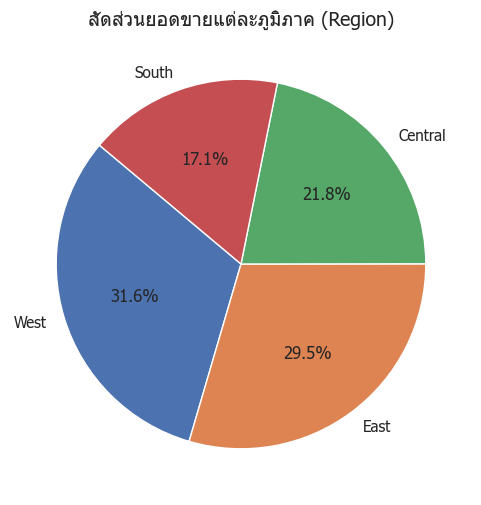

C:\Users\ASUS\AppData\Local\Temp\ipykernel_20700\3754975790.py:101: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_subcat.index, y=top_subcat.values, palette="Greens_d")


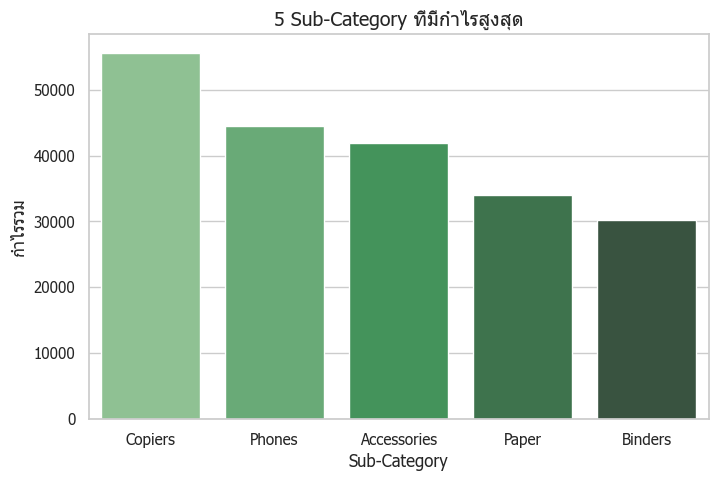


Export CSV เรียบร้อยแล้ว! ดูใน data/processed/


In [4]:
# analysis_th.ipynb

# ==================================================
# Step 1: Import libraries
# ==================================================
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

sns.set(style="whitegrid")  # ตั้งค่า seaborn ให้สวยงาม

# ==================================================
# Step 2: ตั้งค่า Font ภาษาไทย
# ==================================================
plt.rcParams['font.family'] = 'Tahoma'  # Windows ใช้ Tahoma / Mac ใช้ 'Arial Unicode MS'
plt.rcParams['axes.unicode_minus'] = False  # แสดงเครื่องหมาย - ได้ปกติ

# ==================================================
# Step 3: เชื่อม SQLite Database
# ==================================================
DB_PATH = "../database/sales.db"  # path ต้องตรงกับไฟล์ db ของคุณ
conn = sqlite3.connect(DB_PATH)

# ==================================================
# Step 4: โหลดข้อมูลจาก table sales
# ==================================================
df = pd.read_sql("SELECT * FROM sales;", conn)
conn.close()

# ==================================================
# Step 5: แก้ปัญหา column name (snake_case)
# ==================================================
df.columns = [col.strip().lower().replace(" ", "_").replace("-", "_") for col in df.columns]
print("Columns หลังแปลงชื่อ:")
print(df.columns.tolist())

# ==================================================
# Step 6: ตรวจสอบข้อมูลเบื้องต้น
# ==================================================
print("\nShape ของ DataFrame:", df.shape)
display(df.head())
df.info()
display(df.describe())

# ==================================================
# Step 7: Analysis / Aggregation
# ==================================================

# 7.1 ยอดขายรวมแต่ละ Category
category_sales = df.groupby("category").agg({
    "sales": "sum",
    "profit": "sum"
}).sort_values("sales", ascending=False)
print("\nยอดขายรวมแต่ละหมวดหมู่ (Category):")
display(category_sales)

# 7.2 Top 5 Sub-Category กำไรสูงสุด
top_subcat = df.groupby("sub_category")["profit"].sum().sort_values(ascending=False).head(5)
print("\n5 Sub-Category ที่มีกำไรสูงสุด:")
display(top_subcat)

# 7.3 ยอดขายรวมแต่ละ Region
region_sales = df.groupby("region").agg({
    "sales": "sum",
    "profit": "sum"
}).sort_values("sales", ascending=False)
print("\nยอดขายรวมแต่ละภูมิภาค (Region):")
display(region_sales)

# 7.4 จำนวน Order / ยอดขาย / กำไรแต่ละ Segment
segment_sales = df.groupby("segment").agg({
    "sales": "sum",
    "profit": "sum",
    "quantity": "count"
}).sort_values("sales", ascending=False)
print("\nจำนวน Order / ยอดขาย / กำไรแต่ละ Segment:")
display(segment_sales)

# ==================================================
# Step 8: Visualization (ภาษาไทย)
# ==================================================

# 8.1 Bar chart: ยอดขายรวมแต่ละ Category
plt.figure(figsize=(8,5))
sns.barplot(x=category_sales.index, y=category_sales["sales"], palette="Blues_d")
plt.title("ยอดขายรวมแต่ละหมวดหมู่ (Category)", fontsize=14)
plt.ylabel("ยอดขายรวม", fontsize=12)
plt.xlabel("หมวดหมู่", fontsize=12)
plt.show()

# 8.2 Pie chart: สัดส่วนยอดขายแต่ละ Region
plt.figure(figsize=(6,6))
plt.pie(region_sales["sales"], labels=region_sales.index, autopct="%1.1f%%", startangle=140)
plt.title("สัดส่วนยอดขายแต่ละภูมิภาค (Region)", fontsize=14)
plt.show()

# 8.3 Bar chart: Top 5 Sub-Category กำไรสูงสุด
plt.figure(figsize=(8,5))
sns.barplot(x=top_subcat.index, y=top_subcat.values, palette="Greens_d")
plt.title("5 Sub-Category ที่มีกำไรสูงสุด", fontsize=14)
plt.ylabel("กำไรรวม", fontsize=12)
plt.xlabel("Sub-Category", fontsize=12)
plt.show()

# ==================================================
# Step 9: Export CSV สำหรับ Portfolio
# ==================================================
os.makedirs("../data/processed", exist_ok=True)

category_sales.to_csv("../data/processed/category_sales_summary.csv")
top_subcat.to_csv("../data/processed/top_subcategory_profit.csv")
region_sales.to_csv("../data/processed/region_sales_summary.csv")
segment_sales.to_csv("../data/processed/segment_summary.csv")

print("\nExport CSV เรียบร้อยแล้ว! ดูใน data/processed/")
